In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import math

In [2]:
for dirname, _, filenames in os.walk('C:/Users/dheer/OneDrive/Desktop/ML project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/dheer/OneDrive/Desktop/ML project\Report.docx
C:/Users/dheer/OneDrive/Desktop/ML project\test_images.csv
C:/Users/dheer/OneDrive/Desktop/ML project\test_labels.csv
C:/Users/dheer/OneDrive/Desktop/ML project\train_images.csv
C:/Users/dheer/OneDrive/Desktop/ML project\train_labels.csv


In [3]:
df = pd.read_csv('C:/Users/dheer/OneDrive/Desktop/ML project/train_images.csv', header = None)
df

0      1      2      3      4      5      6      7      8      9      \
0        95    101     99    103     95     86     96     89     70    104   
1        91     92     91     89     92     93     96    101    107    104   
2        87     70     72     74     84     78     93    104    106    106   
3         0      0      0      0      0      0      0      0      0      0   
4       114    118    124    119     95    118    105    116    123    112   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6995     90     96     88     95     94    100     95     80     80     71   
6996     82     82     84     91     74     61     73     80     75     97   
6997    133    102    121    133    129    131     98    121    123    125   
6998    118    117    115    107     92     76    100    102     81    106   
6999     74     89     92     87     72    102    100     92     86    107   

      ...  12090  12091  12092  12093  12094  12095  12096  12097  12098  \
0     ...    111    107     92     89    103     99    117    116    118   
1     ...    103     92     93     95     98    105    104    100     90   
2     ...     84     71     95    102     94     80     91     80     84   
3     ...     94     81     89     84     80     90     92     80     88   
4     ...    116    113    102     93    109    104    106    117    111   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6995  ...     88     83     72     76     73     79     76     79     84   
6996  ...    100     78     90     88     80     88     90     90     66   
6997  ...    120    123    119    111    104    102    119    130    131   
6998  ...    104    105    102    111     99     90    105    100    100   
6999  ...     91     89     88    108    121    109    121    126    116   

      12099  
0        96  
1        81  
2        90  
3        96  
4       115  
...     ...  
6995     69  
6996     71  
6997    111  
6998    109  
6999    106  

[7000 rows x 12100 columns]

In [4]:
y = pd.read_csv('C:/Users/dheer/OneDrive/Desktop/ML project/train_labels.csv')
y

Volcano?  Type  Radius  Number Volcanoes
0            1   3.0   17.46               1.0
1            0   NaN     NaN               NaN
2            0   NaN     NaN               NaN
3            0   NaN     NaN               NaN
4            0   NaN     NaN               NaN
...        ...   ...     ...               ...
6995         0   NaN     NaN               NaN
6996         0   NaN     NaN               NaN
6997         0   NaN     NaN               NaN
6998         0   NaN     NaN               NaN
6999         0   NaN     NaN               NaN

[7000 rows x 4 columns]

In [5]:
y[y['Volcano?'] == 1]

Volcano?  Type  Radius  Number Volcanoes
0            1   3.0   17.46               1.0
9            1   1.0   22.02               1.0
15           1   1.0   14.76               1.0
29           1   4.0    6.40               1.0
34           1   3.0   21.63               2.0
...        ...   ...     ...               ...
6940         1   2.0   25.50               1.0
6947         1   2.0   21.10               1.0
6949         1   4.0    4.00               1.0
6975         1   3.0   27.02               1.0
6979         1   4.0    4.47               2.0

[1000 rows x 4 columns]

In [6]:
y['Volcano?'].value_counts()

0    6000
1    1000
Name: Volcano?, dtype: int64

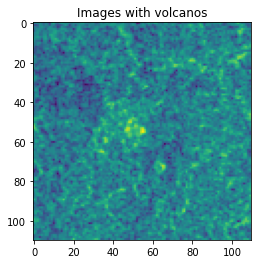

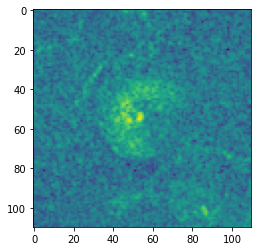

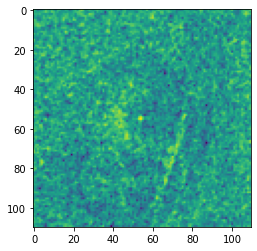

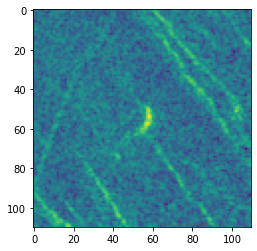

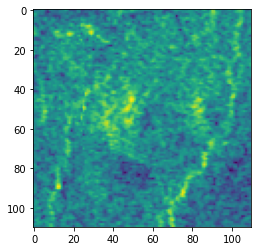

In [7]:
volcanos_index = y[y['Volcano?'] == 1].head().index
plt.title('Images with volcanos')
for i in volcanos_index:
    plt.imshow(df.iloc[i].values.reshape(110, 110, 1))
    plt.show()

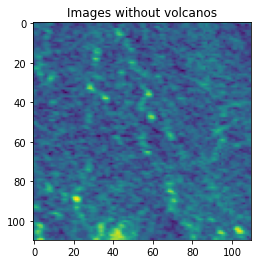

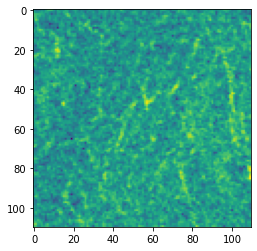

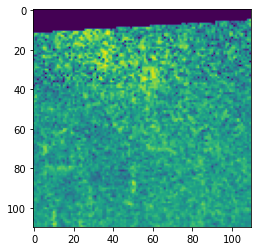

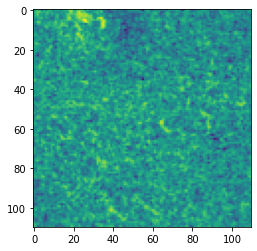

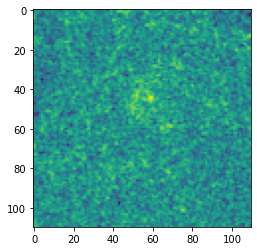

In [8]:
volcanos_index = y[y['Volcano?'] == 0].head().index
plt.title('Images without volcanos')
for i in volcanos_index:
    plt.imshow(df.iloc[i].values.reshape(110, 110, 1))
    plt.show()

In [9]:
df_d = df.values.reshape(len(df), 110, 110, 1)
df_d = df_d / 255
print(f'Shape of each photo: {df_d[0].shape}')
print(f'Scaled data: \nMinimal value: {np.min(np.min(df_d))} \nMaximum value: {np.max(np.max(df_d))}')

Shape of each photo: (110, 110, 1)
Scaled data: 
Minimal value: 0.0 
Maximum value: 0.9176470588235294


In [10]:
scaler= StandardScaler()
scaler.fit(df)

StandardScaler()

In [11]:
scaled_data=scaler.transform(df)

In [12]:
scaled_data

array([[-0.18808425,  0.0385957 , -0.03837855, ...,  0.61267337,
         0.71082094, -0.16017132],
       [-0.33903903, -0.30214548, -0.34133867, ..., -0.01944323,
        -0.40393357, -0.75602568],
       [-0.4899938 , -1.13506838, -1.06086895, ..., -0.80958897,
        -0.64280954, -0.39851307],
       ...,
       [ 1.24598607,  0.07645583,  0.79476177, ...,  1.16577539,
         1.22838553,  0.43568303],
       [ 0.67990568,  0.6443578 ,  0.56754168, ..., -0.01944323,
        -0.00580696,  0.35623578],
       [-0.9805968 , -0.41572588, -0.30346866, ...,  1.00774624,
         0.63119562,  0.23706491]])

In [13]:
def PCa(X , num_components):
     
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [14]:
x_pca=PCa(scaled_data , 9)

In [15]:
scaled_data.shape

(7000, 12100)

In [16]:
x_pca.shape

(7000, 9)

In [17]:
y['Volcano?'][0]

1

In [18]:
def euclidean_distance(row1,row2):
    distance=0.0;
    for i in range(len(row1)-1):
        distance = distance + (row1[i] - row2[i])**2
        sqrtdistance = math.sqrt(distance)
    return sqrtdistance

In [19]:
def get_neighbours(train,test_row,k):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row,train_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda tup:tup[1])
    neighbours = list()

    for i in range(k):
        neighbours.append(distances[i][0])
    return neighbours


In [20]:
df1 = pd.read_csv('C:/Users/dheer/OneDrive/Desktop/ML project/test_images.csv', header = None)
df1

0      1      2      3      4      5      6      7      8      9      \
0       107    116    108    101    107    109    108    110    100    109   
1        93     95     98    100     90    100    108     98     90    103   
2       108    108     92    116    116    140    126    104    112    103   
3       165    164    156    159    151    120    103    114    114    116   
4       105    106     84    115    121    103     94    108    103     91   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2729     87     86     89     83     89     95     95     89     86     89   
2730      0      0      0      0      0      0      0      0      0      0   
2731    122    103    118    121    126    127    112    118     99    106   
2732    150    159    175    174    166    164    146    169    159    116   
2733    160    165    158    136    131    116    101    104    101    111   

      ...  12090  12091  12092  12093  12094  12095  12096  12097  12098  \
0     ...    111    110    109    109    101    106    106    117    130   
1     ...     86     93     59     88     89     89     92     99     92   
2     ...    118    111    113    107    107    121    141    160    131   
3     ...     69     96    109     91     94     83     48     69     86   
4     ...     92     89     96     89     91    102     99     90     90   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2729  ...     73     83     81     70     70     80     82     81     76   
2730  ...      0      0      0      0      0      0      0      0      0   
2731  ...    125    119    125    139    122    114    111    123    135   
2732  ...    160    166    171    150    150    171    179    167    157   
2733  ...    131    122    112    134    136    112    105    121    118   

      12099  
0       134  
1       113  
2       138  
3        75  
4        73  
...     ...  
2729     83  
2730      0  
2731    133  
2732    157  
2733    113  

[2734 rows x 12100 columns]

In [21]:
scaler.fit(df1)

StandardScaler()

In [22]:
scaled_data1=scaler.transform(df1)

In [23]:
scaled_data1

array([[ 0.2787496 ,  0.6258289 ,  0.3271797 , ...,  0.6639303 ,
         1.17839481,  1.32519929],
       [-0.26204921, -0.18380022, -0.05758858, ..., -0.04111778,
        -0.29689915,  0.50748556],
       [ 0.31737809,  0.31739876, -0.28844955, ...,  2.34821183,
         1.21721834,  1.48095429],
       ...,
       [ 0.85817689,  0.12462992,  0.71194798, ...,  0.89894633,
         1.37251244,  1.28626054],
       [ 1.93977451,  2.2836409 ,  2.90512717, ...,  2.6223972 ,
         2.22662999,  2.22079053],
       [ 2.32605938,  2.51496351,  2.2510211 , ...,  0.82060766,
         0.71251251,  0.50748556]])

In [24]:
x_pca_test=PCa(scaled_data1 , 9)

In [25]:
x_pca_test=x_pca_test.tolist()
x_pca=x_pca.tolist()
y_train=y['Volcano?'].tolist()

In [26]:
outarray=[]
for i in range(len(x_pca_test)):
    volcano=0
    novolcano=0
    neighbours = get_neighbours(x_pca,x_pca_test[i],15)
    for neighbour in neighbours:
        l = x_pca.index(neighbour)
        if(y_train[l] == 0):
            novolcano = novolcano+1
        else:
            volcano = volcano+1
    if(novolcano >volcano):
        outarray.append(0)
    else:
        outarray.append(1)
         


In [27]:
print(outarray[2])

0


In [28]:
y_test1 = pd.read_csv('C:/Users/dheer/OneDrive/Desktop/ML project/test_labels.csv')

In [29]:
y_test=y_test1['Volcano?'].tolist() 

In [30]:
count=0
for i in range(len(y_test)):
    if(y_test[i]==outarray[i]):
        count=count+1
accuracy=count/(len(y_test))
print(accuracy)

0.84491587417703


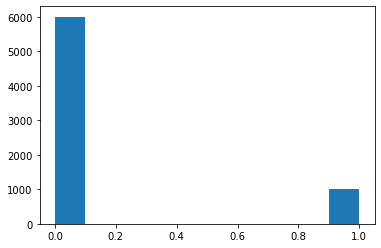

In [31]:
plt.hist(y["Volcano?"])
plt.show()

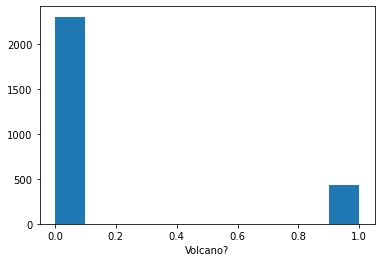

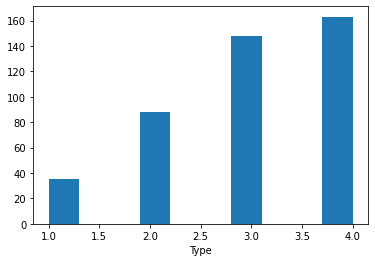

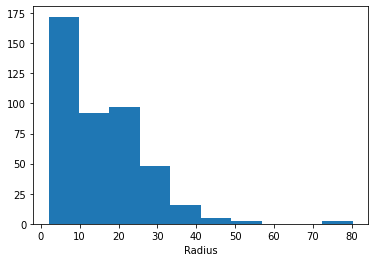

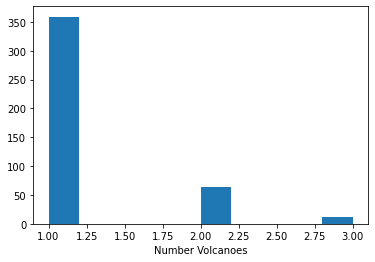

In [32]:
for j in y_test1:
    X = y_test1[j]
    plt.figure()
    plt.hist(X)
    plt.xlabel(j)
plt.show()

Images of volcanoes correctly predicted by our algorithm


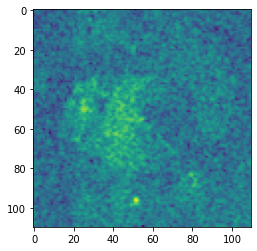

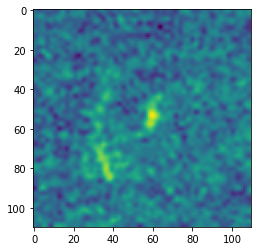

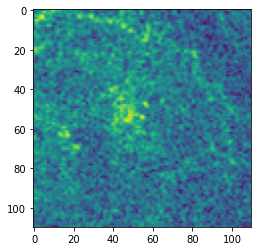

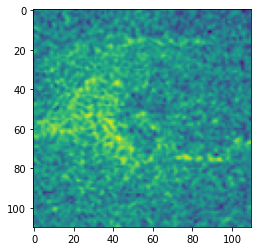

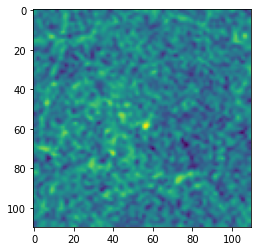

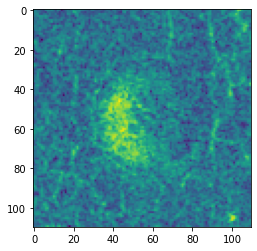

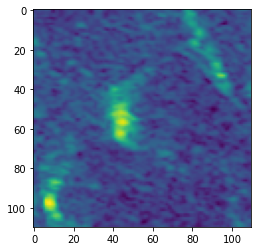

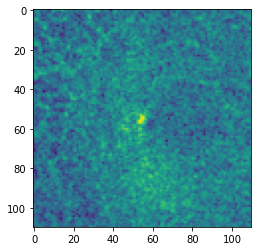

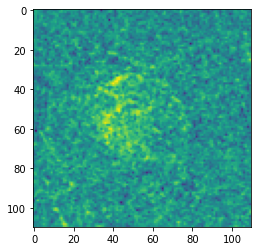

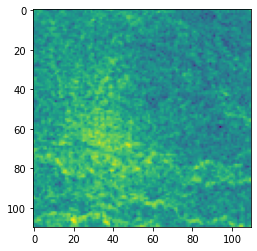

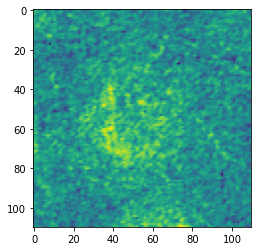

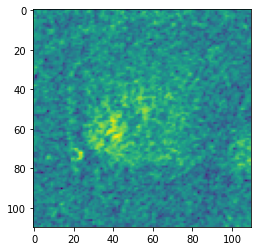

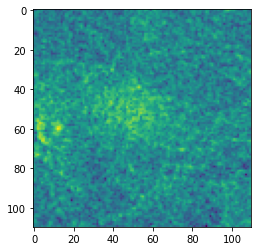

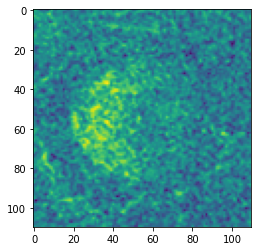

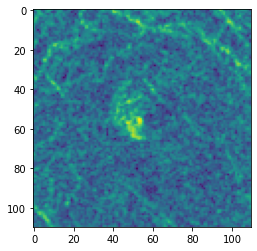

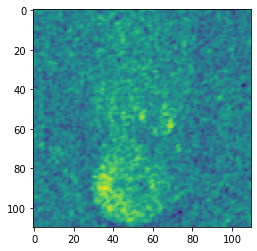

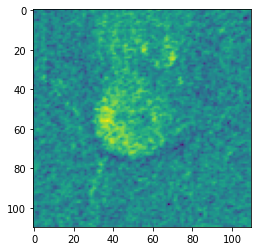

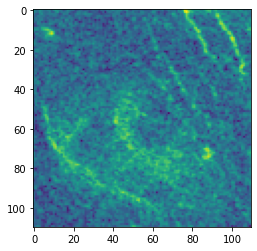

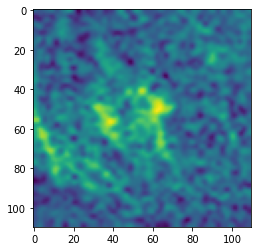

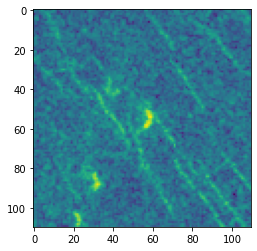

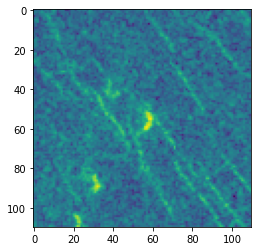

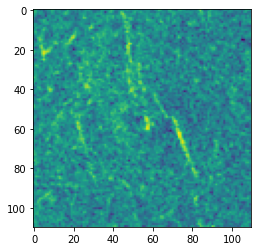

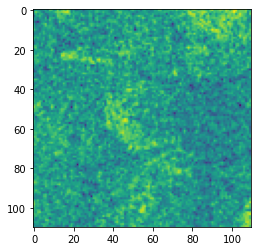

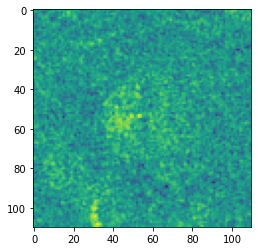

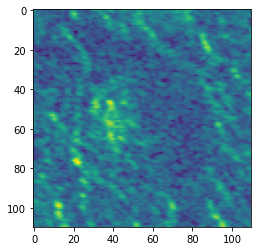

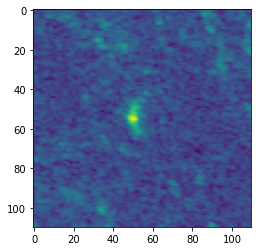

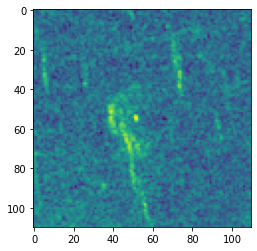

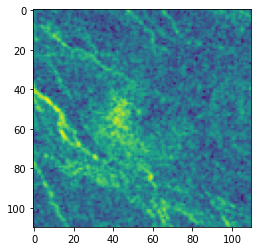

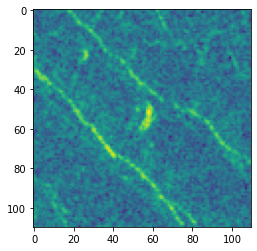

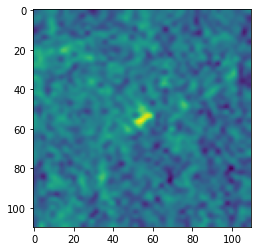

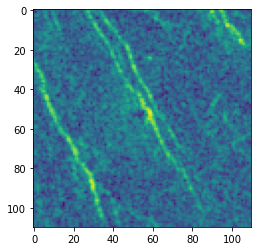

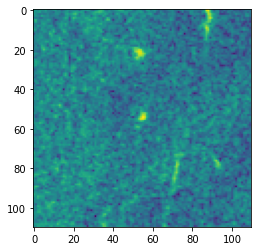

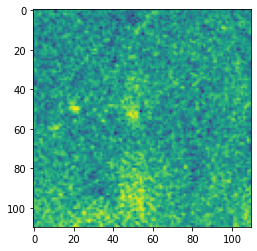

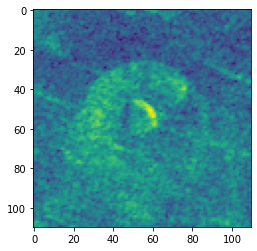

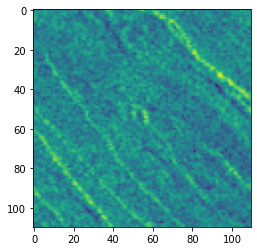

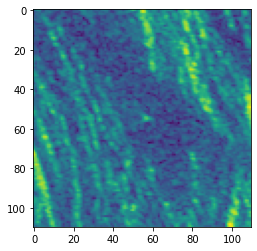

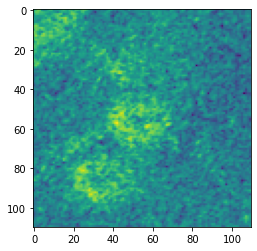

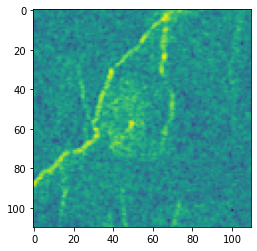

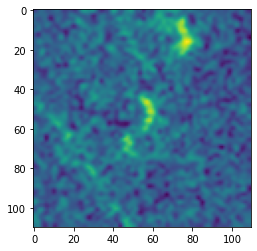

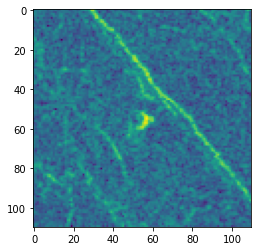

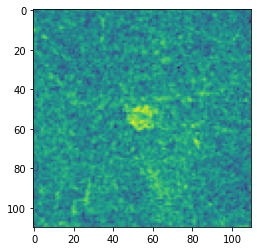

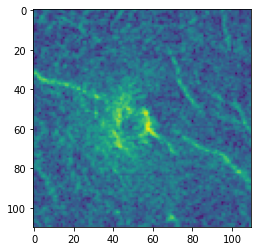

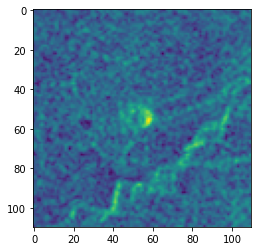

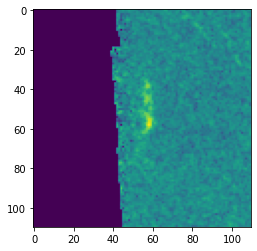

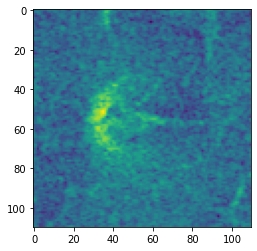

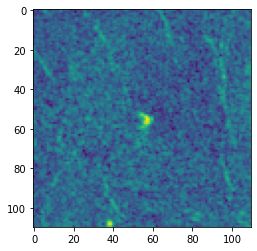

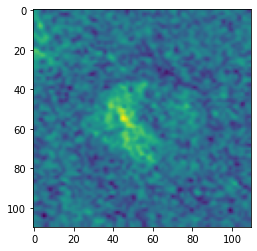

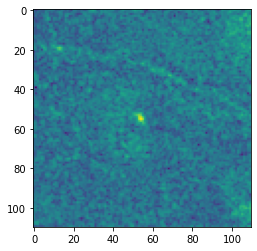

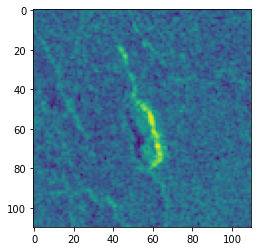

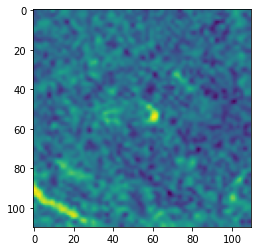

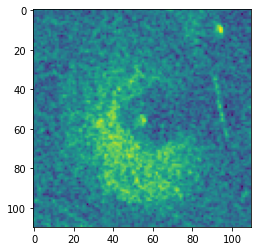

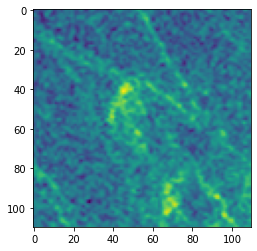

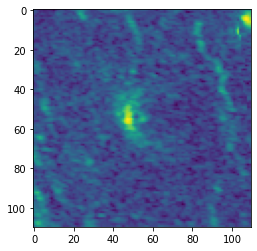

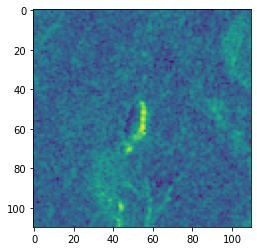

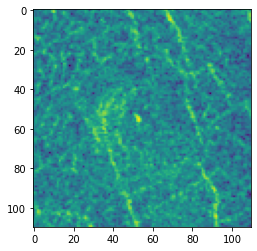

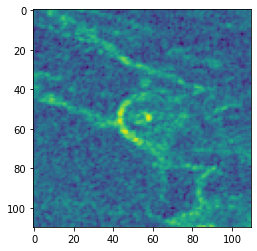

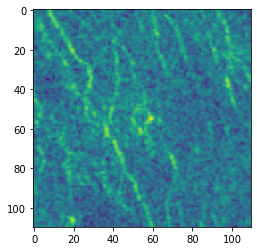

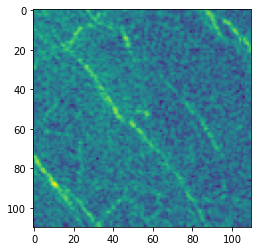

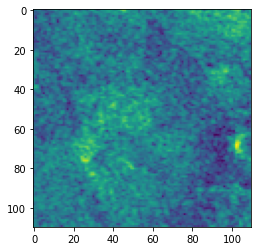

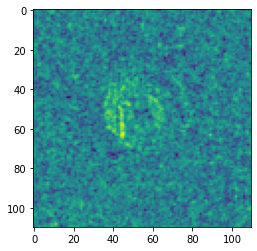

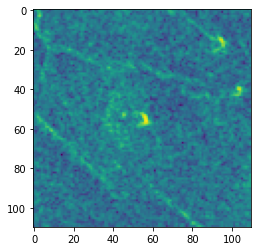

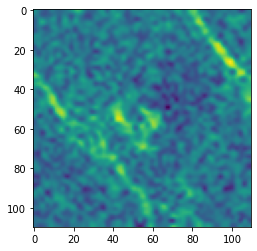

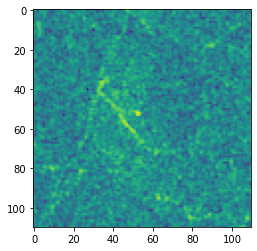

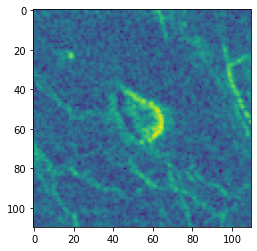

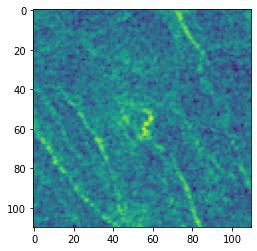

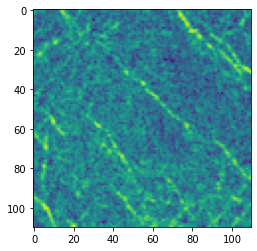

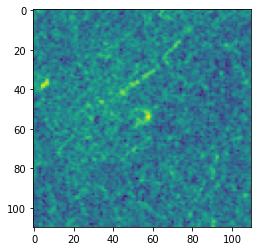

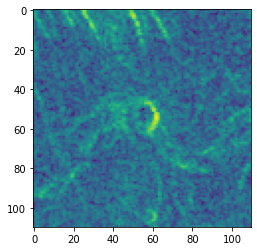

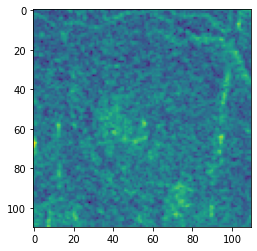

In [33]:
print('Images of volcanoes correctly predicted by our algorithm')
for i in range(len(y_test)):
    if ((outarray[i]==y_test[i]) and outarray[i]==1):
        plt.imshow(df1.iloc[i].values.reshape(110, 110, 1))
    plt.show()
        

In [34]:
print(outarray)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 